# Simple Linear Regression

In this module we will learn how to use data to learn a *trend* and use this trend to predict new observations. First we load the base libraries. 

In [1]:
import csv
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from IPython.display import Image

print('csv: {}'.format(csv.__version__))
print('numpy: {}'.format(np.__version__))
print('scipy: {}'.format(sp.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sk.__version__))

csv: 1.0
numpy: 1.12.1
scipy: 0.19.0
pandas: 0.20.1
sklearn: 0.18.1


The easiest way to learn how regression works is by thinking about an example. Consider an imaginary dataset of buildings built in Denver containing three pieces of information for each building: the year it was built, the number of stories, and the building's total height in feet. 

It might seem obvious that the more stories a building has, the taller it is in feet, and vice versa. Linear regression exploits this idea. Let's say I'm a professor researching buildings and stories, and I want to use the # of stories in a building to estimate its height in feet. I can easily stand outside a building and see how many stories it has, but my tape measurer won't reach many of the roofs in Denver. I do know that the two-story building I live in is right around 20 feet high. My idea is to take the number of stories, and multiply by 10.something, but I'm not sure this will work for other buildings (commercial and industrial buildings for example).

I lament to my friends, and by a stroke of incredible luck one of my pals happens to have an old dataset lying around that contains the information I need! His parchment has records of 60 random buildings in Denver built from 1907 to 1992. Inspecting the first few entries of the parchment:
      
(O) ------------)  
....| 770 : 54 |  
....| 677 : 47 |  
....| 428 : 28 |  
(O)  ------------)  
 
It seems I may need to multiply by more than 10. Taking the first observations and dividing the height by the number of stories for the first three entries gives about 14.3, 14.4, and 15.3 feet per story, respectively. How can I combine all 60 observations to get a good answer? One could naively just take the average of all of these numbers, but in higher dimensions this doesn't work. To help, we have a statistical technique called linear regression. I can use regression to find a good number to multiply the number of stories by (call it $\beta$), and I hope this will help me get an accurate prediction for the height. I know this height will not be exactly right, so there is some error in each prediction. If I write this all out, we have  

$$ \operatorname{(height)} = \operatorname{(\# of stories)} \cdot \beta + \epsilon$$

$$ y = X \beta + \epsilon $$

From algebra, we know this is a linear equation, where $\beta$ is the slope of the line. Linear regression actually seeks to minimize the errors $\epsilon$ (the mean squared error). The plot in the link shows the linear regression line, the data it was estimated from, and the errors or deviations $\epsilon$ for each data point.

In [2]:
Image(url='http://www.radford.edu/~rsheehy/Gen_flash/Tutorials/Linear_Regression/reg-tut_files/linreg3.gif')

But we can learn about the math later. Let's think about other interesting questions. Which would be better for predicting: would # of stories help predict height in feet better than height would predict # of stories? 

Say we decide to predict height using the # of stories. Since we are using one piece of information to predict another, this is called *simple linear regression.* 

Would incorporating the year the building was built help me make a better prediction? This would be an example of *multiple regression* since we would use two pieces of (or more) information to predict.

Okay now its time to go back to python. We will import the data file, get an initial look at the data using pandas functions, and then fit some linear regression models using scikit-learn.

The dataset is in a .csv file, which we need to import. You may have already seen this, but we can use the python standard library function csv.reader, numpy.loadtxt, or pandas.read_csv to import the data. We show all three just as a reminder, but we keep the data as a pandas DataFrame object.

In [3]:
filename = '/Users/jessicagronski/Downloads/bldgstories1.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')

# Load CSV with numpy
import numpy
raw_data = open(filename, 'rb')
data = numpy.loadtxt(raw_data, delimiter=",")

# Load CSV using Pandas
import pandas
colnames = ['year', 'height', 'stories']
data = pandas.read_csv(filename, names=colnames)
data = pandas.DataFrame(data, columns=colnames)

# Know Your Data

Now we inspect the DataFrame using some numpy functions you have already learned such as shape, head, dtypes, corr, and skew functions. Find more methods associated with DataFrame objects!

In [4]:
print('Dimensions:')
print(data.shape)
print('Ten observations:')
print(data.head(6))
print('Correlation matrix:')
correlations = data.corr(method='pearson')
print(correlations)

Dimensions:
(60, 3)
Ten observations:
   year  height  stories
0  1990     770       54
1  1980     677       47
2  1990     428       28
3  1989     410       38
4  1966     371       29
5  1976     504       38
Correlation matrix:
             year    height   stories
year     1.000000  0.110269  0.113561
height   0.110269  1.000000  0.950555
stories  0.113561  0.950555  1.000000


Remember we can acces the five number summary + some using the describe function.

In [5]:
pandas.set_option('precision', 3)
description = data.describe()
print(description)

           year    height  stories
count    60.000    60.000   60.000
mean   1971.667   546.333   40.383
std      21.935   186.213   15.675
min    1907.000   320.000   18.000
25%    1970.500   428.000   30.000
50%    1978.500   499.000   37.000
75%    1987.250   582.250   48.250
max    1992.000  1250.000  102.000


# Regression Model

We fit a linear regression model below. We try to use height to predict the number of stories in a building.

In [9]:
from sklearn import linear_model
obj = linear_model.LinearRegression()
obj.fit(np.array(data.height.values.reshape(-1,1)), data.stories )#need this values.reshape(-1,1) to avoid deprecation warnings
print( obj.coef_, obj.intercept_ )

(array([ 0.08001458]), -3.331298458295862)


We show the data and the regression lines.

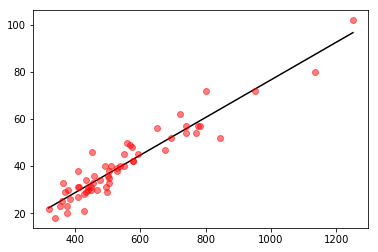

In [10]:
x_min, x_max = data.height.values.min() - .5, data.height.values.max() + .5 # for plotting
x_rng = np.linspace(x_min,x_max,200)

plt.plot(x_rng, x_rng * obj.coef_ + obj.intercept_, 'k')
plt.plot(data.height.values, data.stories.values,'ro', alpha = 0.5)
plt.show()

Check residuals for normality.

Now we will do multiple linear regression. This means we will use more than one predictor when we fit a model and predict our response variable # of stories. We will use both height and the year it was built. We can look at the mean squared error for both models and see which one predicts one better.

In [11]:
obj2 = linear_model.LinearRegression()
X = np.array( (data.height.values, data.year.values))
obj2.fit(X.transpose() , data.stories)
print(obj2.coef_, obj2.intercept_)

(array([ 0.07993241,  0.00632569]), -15.758552254542543)


In [15]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection = '3d')
#ax.plot(data.height.values, data.year.values , data.stories.values, 'bo')

ax.plot_surface(data.height.values, data.year.values, (np.dot(X.transpose(),obj2.coef_) \
                + obj2.intercept_), color='b')

ax.show()
#plt.close()

##### doesn't work - have the students try to solve it.

AttributeError: 'Axes3DSubplot' object has no attribute 'show'

In [14]:
print(np.dot(X.transpose(),obj2.coef_).shape)

(60,)


In [ ]:
data.height.values.shape